In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading the data
AirPassengers = pd.read_csv("AirPassengers.csv", parse_dates=[0]) 
# marking first column to datatype format

AirPassengers.describe().T

AirPassengers.head()

,Travel date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


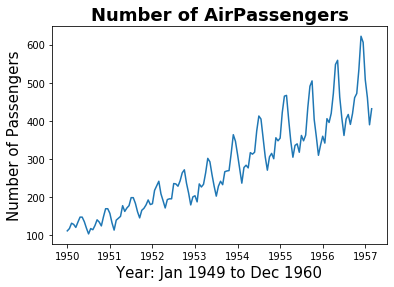

In [7]:
#Feching years
year = AirPassengers['Travel date'].dt.year

#Visualizing the time-series
fig, ax = plt.subplots()
ax.plot(AirPassengers.Passengers)
ax.set_title('Number of AirPassengers', weight='bold', fontsize=18)
ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 1949 to Dec 1960', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()

In [12]:
#Read datset without parsing
AirPassengers = pd.read_csv('AirPassengers.csv')

#Analysing the datatype of columns
AirPassengers.dtypes

#Changing the datatype of Travel date
AirPassengers['Travel date'] = pd.to_datetime(AirPassengers['Travel date'])
AirPassengers.dtypes


#Making Travel date as Index and dropping current column to change the frequency
AirPassengers.index = AirPassengers['Travel date']
AirPassengers.drop(['Travel date'], axis=1, inplace=True)

#Changing frequency from daily to month end and getting passenger for each month
AirPassengers.resample('M').mean().head()

#Note - M is one of the DateOffset object  provided by Pandas

,Passengers
Travel date,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [13]:
#Creating a date time range with a particular frequency:

#Generating 10 random values
np.random.seed(42)
val = np.arange(500)
np.random.shuffle(val)
val = val[:10]
val



array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450])

In [14]:
dummy_ = pd.DataFrame(val, index=pd.date_range(start='1/1/1910', 
                                                  end='1/10/1910', freq='D'), 
                                                 columns=['RandomData'])

dummy_

,RandomData
1910-01-01,361
1910-01-02,73
1910-01-03,374
1910-01-04,155
1910-01-05,104
1910-01-06,394
1910-01-07,377
1910-01-08,124
1910-01-09,68
1910-01-10,450


In [17]:
#Converting an unsorted date into a sorted date time:

#Creation of unordered date
date = pd.date_range(start='1/1/1910', end='1/10/1910', freq='D')

idx_ = np.arange(10) # meant to generate unordered index
np.random.shuffle(idx_)

unordered_data = pd.DataFrame(val, index=date[idx_], columns=['Random data'])
unordered_data

,Random data
1910-01-07,361
1910-01-09,73
1910-01-02,374
1910-01-08,155
1910-01-06,104
1910-01-01,394
1910-01-10,377
1910-01-04,124
1910-01-05,68
1910-01-03,450


In [18]:
#sorting dataframe based on date index
unordered_data.sort_index(inplace=True)
unordered_data

,Random data
1910-01-01,394
1910-01-02,374
1910-01-03,450
1910-01-04,124
1910-01-05,68
1910-01-06,104
1910-01-07,361
1910-01-08,155
1910-01-09,73
1910-01-10,377


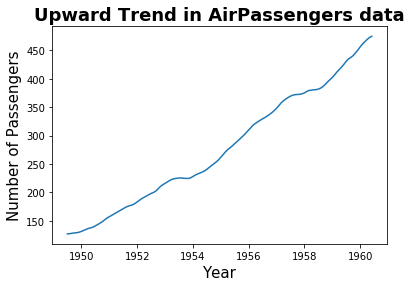

In [24]:
#Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Another way to load a time series data by defining a date format
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', 
                          date_parser=dateparse)

# Visualizing trend of Airpassengers data
plt.plot(seasonal_decompose(AirPassenger).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Upward Trend in AirPassengers data', weight='bold', fontsize=18)
plt.show()

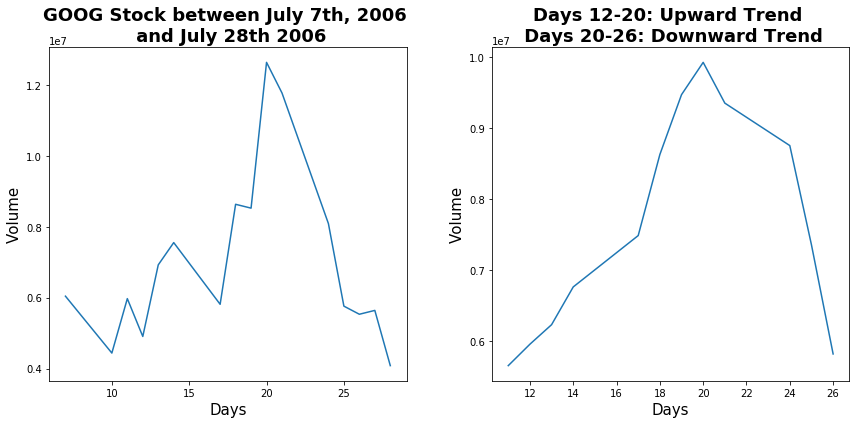

In [25]:
#Reading file

dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
GOOG_stock = pd.read_csv('GOOG_July_7_28.csv', index_col='Date',
                        date_parser=dateparse)

#Visualizing upward and downward trends
plt.figure(figsize=(12, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
ax1.plot(GOOG_stock.index.day, GOOG_stock.Volume ) #labeling only days
ax1.set_xlabel('Days', fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)
ax1.set_title('GOOG Stock between July 7th, 2006 \n and July 28th 2006',
             weight='bold', fontsize=18)

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.plot(GOOG_stock.index.day,
            seasonal_decompose(GOOG_stock.Volume).trend)
ax2.set_xlabel('Days', fontsize=15)
ax2.set_ylabel('Volume', fontsize=15)
ax2.set_title('Days 12-20: Upward Trend \n Days 20-26: Downward Trend', weight='bold', fontsize=18)

plt.tight_layout()

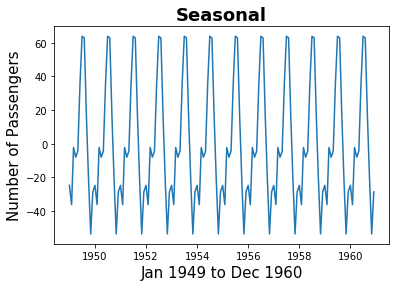

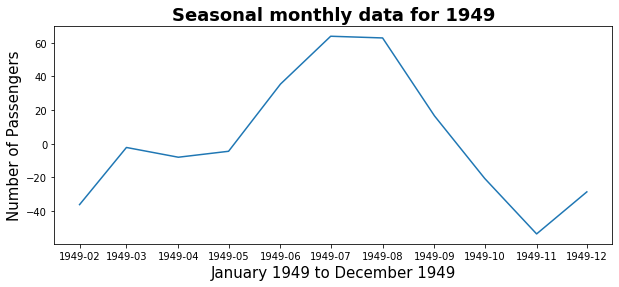

In [27]:
#Visualizing seasonality of Airpassengers data
plt.plot(seasonal_decompose(AirPassengers).seasonal)
plt.xlabel('Jan 1949 to Dec 1960', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Seasonal', weight='bold', fontsize=18)
plt.show()

#Visualizing seasonality of Airpassengers data for year 1949 
plt.figure(figsize=(10, 4))
plt.plot(seasonal_decompose(AirPassengers).seasonal.iloc[1:12,:])
plt.xlabel('January 1949 to December 1949', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Seasonal monthly data for 1949', weight='bold', fontsize=18)
plt.show()